In [1]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()
from mpl_toolkits.mplot3d import Axes3D


In [3]:
df_cpm = pd.read_csv(r"C:\Users\Jigar\Desktop\Courses\Quater 3\Experiential\Viacom Dataset\Main file\cpm_estimates-15Apr19.csv")

In [4]:
df_cpm.head()

age_min age_max  female  male       cpm                  hID        date
0       18      24       0     1  3.678763  8910733059390721166  2018-10-02
1       18      24       1     0  3.026950  8910733059390721166  2018-10-02
2       18      24       1     1  3.114728  8910733059390721166  2018-10-02
3       25      34       0     1  3.011565  8910733059390721166  2018-10-02
4       25      34       1     0  4.032152  8910733059390721166  2018-10-02

### Changes Gender Column

In [5]:
#gender column
def gender(row):
    if (row['female'] == 1) & (row['male'] == 0):
        return 'Female'
    if (row['female'] == 0) & (row['male'] == 1):
        return 'Male'
    if (row['female'] == 1) & (row['male'] == 1):
        return 'Other'
    return

In [6]:
df_cpm['gender'] = df_cpm.apply(lambda row: gender(row), axis = 1)

In [7]:
# converting alphabtical gender into numeric categorical values

In [8]:
df_cpm['gender_cat'] = df_cpm['gender'].astype('category')
df_cpm['gender_cat'] = df_cpm['gender_cat'].cat.codes

### AGE Range

In [9]:
#age range column
df_cpm['age_range']= df_cpm.age_min.astype(str)+'-'+df_cpm.age_max.astype(str)

In [10]:
df_cpm.head()

age_min age_max  female  male       cpm                  hID        date  \
0       18      24       0     1  3.678763  8910733059390721166  2018-10-02   
1       18      24       1     0  3.026950  8910733059390721166  2018-10-02   
2       18      24       1     1  3.114728  8910733059390721166  2018-10-02   
3       25      34       0     1  3.011565  8910733059390721166  2018-10-02   
4       25      34       1     0  4.032152  8910733059390721166  2018-10-02   

   gender  gender_cat age_range  
0    Male           1     18-24  
1  Female           0     18-24  
2   Other           2     18-24  
3    Male           1     25-34  
4  Female           0     25-34

In [11]:
## creating a Data dictionary for age_range to keep uniformity amongst the page level files
age_dictionary = dict({'13-17'  : '0' ,
'18-24'  : '1' ,
'18-34'  : '2' ,
'18-44'  : '3' ,
'18-49'  : '4' ,
'18-54'  : '5' ,
'18-65+' : '6' ,
'25-34'  : '7' ,
'25-54'  : '8' ,
'34-44'  : '9' ,
'35-44'  : '10',
'44-54'  : '11',
'45-54'  : '12',
'55-64': '13'})

In [12]:
df_cpm['age_range_cat'] = df_cpm['age_range'].map(age_dictionary)

In [13]:
df_cpm['age_range_cat'] = pd.to_numeric(df_cpm['age_range_cat'])

In [14]:
df_cpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91646 entries, 0 to 91645
Data columns (total 11 columns):
age_min          91646 non-null int64
age_max          91646 non-null object
female           91646 non-null int64
male             91646 non-null int64
cpm              91646 non-null float64
hID              91646 non-null int64
date             91646 non-null object
gender           91646 non-null object
gender_cat       91646 non-null int8
age_range        91646 non-null object
age_range_cat    91646 non-null int64
dtypes: float64(1), int64(5), int8(1), object(4)
memory usage: 7.1+ MB


### Changes into date column 

In [15]:
df_cpm[['year','month','day']] = df_cpm['date'].str.split('-',expand=True)

In [16]:
df_cpm.head()

age_min age_max  female  male       cpm                  hID        date  \
0       18      24       0     1  3.678763  8910733059390721166  2018-10-02   
1       18      24       1     0  3.026950  8910733059390721166  2018-10-02   
2       18      24       1     1  3.114728  8910733059390721166  2018-10-02   
3       25      34       0     1  3.011565  8910733059390721166  2018-10-02   
4       25      34       1     0  4.032152  8910733059390721166  2018-10-02   

   gender  gender_cat age_range  age_range_cat  year month day  
0    Male           1     18-24              1  2018    10  02  
1  Female           0     18-24              1  2018    10  02  
2   Other           2     18-24              1  2018    10  02  
3    Male           1     25-34              7  2018    10  02  
4  Female           0     25-34              7  2018    10  02

In [17]:
#converting date to datetime format
df_cpm['date']=pd.to_datetime(df_cpm['date'])

In [18]:
df_cpm['quarter'] = df_cpm['date'].dt.quarter

In [19]:
df_cpm.head()

age_min age_max  female  male       cpm                  hID       date  \
0       18      24       0     1  3.678763  8910733059390721166 2018-10-02   
1       18      24       1     0  3.026950  8910733059390721166 2018-10-02   
2       18      24       1     1  3.114728  8910733059390721166 2018-10-02   
3       25      34       0     1  3.011565  8910733059390721166 2018-10-02   
4       25      34       1     0  4.032152  8910733059390721166 2018-10-02   

   gender  gender_cat age_range  age_range_cat  year month day  quarter  
0    Male           1     18-24              1  2018    10  02        4  
1  Female           0     18-24              1  2018    10  02        4  
2   Other           2     18-24              1  2018    10  02        4  
3    Male           1     25-34              7  2018    10  02        4  
4  Female           0     25-34              7  2018    10  02        4

### Data ready for Training and Testing to estimate CPM values

### Model 1

In [20]:
#independent variables
X = df_cpm[['year','month','day','quarter','age_range_cat','gender_cat']]
#dependent variables
y = df_cpm['cpm']

#making train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
random = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [22]:
y_pred = random.predict(X_test)

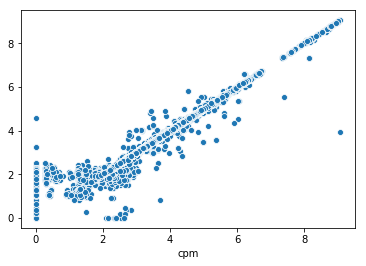

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(y_test,y_pred)

In [24]:
# Calculate the absolute errors
err = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(err), 2), 'degrees.')
print('Accuracy:', random.score(X_test, y_test))

Mean Absolute Error: 0.04 degrees.
Accuracy: 0.9646666274558647


### Importing Page Level dataset : Page Impression age gender unique

In [25]:
df_pg_imp = pd.read_csv(r"C:\Users\Jigar\Desktop\Courses\Quater 3\Experiential\Viacom Dataset\Main file\page_impressions_by_age_gender_unique.csv")

In [26]:
df_pg_imp.head()

date                                   name   metric   value  \
0  2018-01-01  page_impressions_by_age_gender_unique  M.13-17   208.0   
1  2018-01-01  page_impressions_by_age_gender_unique    U.65+    15.0   
2  2018-01-01  page_impressions_by_age_gender_unique  U.45-54     8.0   
3  2018-01-01  page_impressions_by_age_gender_unique  F.35-44  2872.0   
4  2018-01-01  page_impressions_by_age_gender_unique  M.55-64   239.0   

                   hID  quarter  month  weekday  index  
0  6637756471418353635        1      1        0     17  
1  6637756471418353635        1      1        0     41  
2  6637756471418353635        1      1        0     48  
3  6637756471418353635        1      1        0     58  
4  6637756471418353635        1      1        0     64

In [27]:
#removing unneccessary col
df_pg_imp.drop('month', axis = 1,inplace = True)

In [28]:
#spliting date col into year month and day
df_pg_imp[['year','month','day']] = df_pg_imp['date'].str.split('-',expand=True)

In [29]:
#converting date to datetime type
df_pg_imp['date'] = pd.to_datetime(df_pg_imp['date'])

In [30]:
#spliting metric col to gender and age_range
df_pg_imp[['gender','age_range']] = df_pg_imp['metric'].str.split('.',expand=True)

In [31]:
#Replacing the values of Gender
df_pg_imp['gender'] = df_pg_imp.gender.replace('U','Other')
df_pg_imp['gender'] = df_pg_imp.gender.replace('F','Female')
df_pg_imp['gender'] = df_pg_imp.gender.replace('M','Male')

In [32]:
#creating category of gender
df_pg_imp['gender_cat'] = df_pg_imp['gender'].astype('category')
df_pg_imp['gender_cat'] = df_pg_imp['gender_cat'].cat.codes

In [33]:
#replacing a age range
df_pg_imp['age_range'] = df_pg_imp.age_range.replace('65+','18-65+')

In [34]:
#Creating Category of age range mapping defined age_dictionary
df_pg_imp['age_range_cat'] = df_pg_imp['age_range'].map(age_dictionary)

In [35]:
df_pg_imp.head()

date                                   name   metric   value  \
0 2018-01-01  page_impressions_by_age_gender_unique  M.13-17   208.0   
1 2018-01-01  page_impressions_by_age_gender_unique    U.65+    15.0   
2 2018-01-01  page_impressions_by_age_gender_unique  U.45-54     8.0   
3 2018-01-01  page_impressions_by_age_gender_unique  F.35-44  2872.0   
4 2018-01-01  page_impressions_by_age_gender_unique  M.55-64   239.0   

                   hID  quarter  weekday  index  year month day  gender  \
0  6637756471418353635        1        0     17  2018    01  01    Male   
1  6637756471418353635        1        0     41  2018    01  01   Other   
2  6637756471418353635        1        0     48  2018    01  01   Other   
3  6637756471418353635        1        0     58  2018    01  01  Female   
4  6637756471418353635        1        0     64  2018    01  01    Male   

  age_range  gender_cat age_range_cat  
0     13-17           1             0  
1    18-65+           2             6  
2     45-54           2            12  
3     35-44           0            10  
4     55-64           1            13

In [36]:
X_train_cpm = df_cpm[['year','month','day','quarter','age_range_cat','gender_cat']]
y_train_cpm = df_cpm['cpm']
X_test_pg_imp = df_pg_imp[['year','month','day','quarter','age_range_cat','gender_cat']]

In [37]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
random = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
random.fit(X_train_cpm, y_train_cpm)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [38]:
y_pred_pg_imp = random.predict(X_test_pg_imp)

In [39]:
len(y_pred_pg_imp)

2094349

In [40]:
df_pg_imp['cpm'] = y_pred_pg_imp

### Formating data for K-means Clustering

In [41]:
df_imp_cl =  df_pg_imp[['year','month','quarter','gender','age_range','cpm','value']]

In [42]:
df_imp_cl =df_imp_cl.rename(index=str, columns={"value": "total_imp"})

In [43]:
df_imp_cl.head()

year month  quarter  gender age_range       cpm  total_imp
0  2018    01        1    Male     13-17  2.864454      208.0
1  2018    01        1   Other    18-65+  3.002203       15.0
2  2018    01        1   Other     45-54  3.883401        8.0
3  2018    01        1  Female     35-44  3.659392     2872.0
4  2018    01        1    Male     55-64  3.597703      239.0

In [44]:
df_imp_cl= df_imp_cl[df_imp_cl['year']=='2018']

In [45]:
df_imp_cl.head()

year month  quarter  gender age_range       cpm  total_imp
0  2018    01        1    Male     13-17  2.864454      208.0
1  2018    01        1   Other    18-65+  3.002203       15.0
2  2018    01        1   Other     45-54  3.883401        8.0
3  2018    01        1  Female     35-44  3.659392     2872.0
4  2018    01        1    Male     55-64  3.597703      239.0

In [46]:
month_dummy = pd.get_dummies(df_imp_cl['month'])
quarter_dummy = pd.get_dummies(df_imp_cl['quarter'])
gender_dummy = pd.get_dummies(df_imp_cl['gender'])
age_range_dummy = pd.get_dummies(df_imp_cl['age_range'])

In [47]:
df_imp_cl= pd.concat([df_imp_cl,month_dummy, quarter_dummy,gender_dummy,age_range_dummy], axis=1)

In [48]:
pd.options.display.max_columns = None

In [49]:
df_imp_cl.head()

year month  quarter  gender age_range       cpm  total_imp  01  02  03  04  \
0  2018    01        1    Male     13-17  2.864454      208.0   1   0   0   0   
1  2018    01        1   Other    18-65+  3.002203       15.0   1   0   0   0   
2  2018    01        1   Other     45-54  3.883401        8.0   1   0   0   0   
3  2018    01        1  Female     35-44  3.659392     2872.0   1   0   0   0   
4  2018    01        1    Male     55-64  3.597703      239.0   1   0   0   0   

   05  06  07  08  09  10  11  12  1  2  3  4  Female  Male  Other  13-17  \
0   0   0   0   0   0   0   0   0  1  0  0  0       0     1      0      1   
1   0   0   0   0   0   0   0   0  1  0  0  0       0     0      1      0   
2   0   0   0   0   0   0   0   0  1  0  0  0       0     0      1      0   
3   0   0   0   0   0   0   0   0  1  0  0  0       1     0      0      0   
4   0   0   0   0   0   0   0   0  1  0  0  0       0     1      0      0   

   18-24  18-65+  25-34  35-44  45-54  55-64  
0      0       0      0      0      0      0  
1      0       1      0      0      0      0  
2      0       0      0      0      1      0  
3      0       0      0      1      0      0  
4      0       0      0      0      0      1

In [50]:
df_cluster_demog =df_imp_cl.drop(['year','month','quarter','age_range','gender'], axis=1)

In [51]:
df_cluster_demog.head()

cpm  total_imp  01  02  03  04  05  06  07  08  09  10  11  12  1  2  \
0  2.864454      208.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
1  3.002203       15.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
2  3.883401        8.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
3  3.659392     2872.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
4  3.597703      239.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   

   3  4  Female  Male  Other  13-17  18-24  18-65+  25-34  35-44  45-54  55-64  
0  0  0       0     1      0      1      0       0      0      0      0      0  
1  0  0       0     0      1      0      0       1      0      0      0      0  
2  0  0       0     0      1      0      0       0      0      0      1      0  
3  0  0       1     0      0      0      0       0      0      1      0      0  
4  0  0       0     1      0      0      0       0      0      0      0      1

In [52]:
mms = MinMaxScaler()

In [53]:
mms.fit(df_cluster_demog)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
data_transformed = mms.transform(df_cluster_demog)

In [55]:
Sum_of_squared_distances = []

In [56]:
K = range(1,15)

In [57]:
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

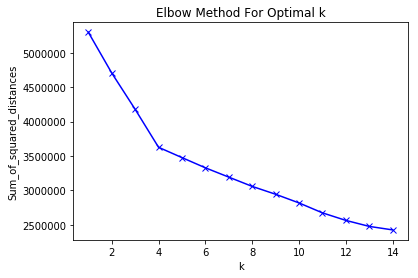

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [59]:
cluster=KMeans(n_clusters=4)
df_cluster_demog['cluster']=cluster.fit_predict(df_cluster_demog)

In [60]:
df_cluster_demog.head()

cpm  total_imp  01  02  03  04  05  06  07  08  09  10  11  12  1  2  \
0  2.864454      208.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
1  3.002203       15.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
2  3.883401        8.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
3  3.659392     2872.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   
4  3.597703      239.0   1   0   0   0   0   0   0   0   0   0   0   0  1  0   

   3  4  Female  Male  Other  13-17  18-24  18-65+  25-34  35-44  45-54  \
0  0  0       0     1      0      1      0       0      0      0      0   
1  0  0       0     0      1      0      0       1      0      0      0   
2  0  0       0     0      1      0      0       0      0      0      1   
3  0  0       1     0      0      0      0       0      0      1      0   
4  0  0       0     1      0      0      0       0      0      0      0   

   55-64  cluster  
0      0        0  
1      0        0  
2      0        0  
3      0        0  
4      1        0

In [61]:
df_cluster_demog_0 = df_cluster_demog[df_cluster_demog['cluster'] == 0]
df_cluster_demog_1 = df_cluster_demog[df_cluster_demog['cluster'] == 1]
df_cluster_demog_2 = df_cluster_demog[df_cluster_demog['cluster'] == 2]
df_cluster_demog_3 = df_cluster_demog[df_cluster_demog['cluster'] == 3]

In [280]:
df_cluster_demog.tail()

cpm  total_imp  01  02  03  04  05  06  07  08  09  10  11  12  \
1655256  3.096979        4.0   0   0   0   0   0   0   0   0   0   0   0   1   
1655257  3.330212      611.0   0   0   0   0   0   0   0   0   0   0   0   1   
1655258  3.386876       40.0   0   0   0   0   0   0   0   0   0   0   0   1   
1655259  3.530046      350.0   0   0   0   0   0   0   0   0   0   0   0   1   
1655260  3.530046      451.0   0   0   0   0   0   0   0   0   0   0   0   1   

         1  2  3  4  Female  Male  Other  13-17  18-24  18-65+  25-34  35-44  \
1655256  0  0  0  1       0     1      0      0      0       1      0      0   
1655257  0  0  0  1       0     0      1      0      0       0      0      1   
1655258  0  0  0  1       1     0      0      0      0       1      0      0   
1655259  0  0  0  1       1     0      0      0      0       0      0      1   
1655260  0  0  0  1       1     0      0      0      0       0      0      1   

         45-54  55-64  cluster  
1655256      0      0        0  
1655257      0      0        0  
1655258      0      0        0  
1655259      0      0        0  
1655260      0      0        0

In [283]:
df1 = df_cluster_demog_0.mean(axis = 0)
df2 = df_cluster_demog_1.mean(axis = 0)
df3 = df_cluster_demog_2.mean(axis = 0)
df4 = df_cluster_demog_3.mean(axis = 0)

In [284]:
df_table_v1 = pd.concat([df1,df2,df3,df4], axis =1)
df_table_v1.columns = ['cluster_1','cluster_2','cluster_3','cluster_4']
df_table_v1

cluster_1     cluster_2     cluster_3      cluster_4
cpm           3.664512  3.591693e+00  3.512375e+00       3.640527
total_imp  5547.936620  2.756496e+06  1.086177e+06  336011.082048
01            0.082075  9.489576e-02  1.063153e-01       0.109700
02            0.080975  4.601006e-02  7.223989e-02       0.071288
03            0.084682  5.535586e-02  7.754051e-02       0.073665
04            0.082104  7.692308e-02  9.480539e-02       0.074416
05            0.083934  8.914450e-02  8.253824e-02       0.085489
06            0.081362  1.675054e-01  8.284113e-02       0.088367
07            0.086091  1.603163e-01  9.859155e-02       0.084770
08            0.084911  1.581596e-01  1.072240e-01       0.108480
09            0.083534  2.947520e-02  7.208844e-02       0.073446
10            0.086265  4.241553e-02  9.419961e-02       0.083112
11            0.080002  5.463695e-02  7.254278e-02       0.075104
12            0.084063  2.516175e-02  3.907315e-02       0.072164
1             0.247733  1.962617e-01  2.560957e-01       0.254653
2             0.247401  3.335730e-01  2.601848e-01       0.248272
3             0.254536  3.479511e-01  2.779040e-01       0.266696
4             0.250330  1.222142e-01  2.058155e-01       0.230379
Female        0.373914  5.176132e-01  5.131001e-01       0.549439
Male          0.372733  4.823868e-01  4.868999e-01       0.450561
Other         0.253353  0.000000e+00  0.000000e+00       0.000000
13-17         0.125272  0.000000e+00  3.028926e-03       0.033439
18-24         0.143026  5.506830e-01  3.822505e-01       0.328787
18-65+        0.141297  0.000000e+00  4.543389e-04       0.011949
25-34         0.148809  4.104960e-01  4.752385e-01       0.332103
35-44         0.151156  3.594536e-02  1.170680e-01       0.186743
45-54         0.148242  2.875629e-03  1.999091e-02       0.080860
55-64         0.142198  0.000000e+00  1.968802e-03       0.026119
cluster       0.000000  1.000000e+00  2.000000e+00       3.000000

cpm          3.512375e+00
total_imp    1.086177e+06
01           1.063153e-01
02           7.223989e-02
03           7.754051e-02
dtype: float64

### Conversion Funnel Clustering

In [124]:
df_funnel = df_pg_imp[['date','hID','value','cpm']]

In [125]:
df_funnel =df_funnel.rename(index=str, columns={"value": "total_imp"})
df_funnel.head()

date                  hID  total_imp       cpm
0 2018-01-01  6637756471418353635      208.0  2.864454
1 2018-01-01  6637756471418353635       15.0  3.002203
2 2018-01-01  6637756471418353635        8.0  3.883401
3 2018-01-01  6637756471418353635     2872.0  3.659392
4 2018-01-01  6637756471418353635      239.0  3.597703

In [126]:
#group by date and HId
df_funnel_mrg = (df_funnel.groupby(['date','hID'], as_index=False).agg({'total_imp':'sum', 'cpm':'mean'}))

In [127]:
# function defined to merge page level files
def merge(df1, df2):
    df = pd.merge(df1,df2,on=['date','hID'], how = 'left')
    return df

In [128]:
df_funnel_mrg.head()

date                  hID  total_imp       cpm
0 2018-01-01 -9175544061209790002   188755.0  3.315909
1 2018-01-01 -9156617651427282577     7364.0  3.359085
2 2018-01-01 -9145254332915205176    11180.0  3.341241
3 2018-01-01 -9124186022016029939    10045.0  3.302552
4 2018-01-01 -9060515269420703901  3120549.0  3.315909

In [129]:
# loading all Page level files

df_pg_imp_paid = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_impressions_paid.csv")
df_pg_imp_organic = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_impressions_organic.csv")
df_pg_view = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_views_total.csv")
df_post = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_posts_impressions.csv")
df_post_paid = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_posts_impressions_paid.csv")
df_post_organic = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_posts_impressions_organic.csv")
df_video = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_video_views.csv")
df_video_paid= pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_video_views_paid.csv")
df_video_organic = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_video_views_organic.csv")
df_post_eng= pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_post_engagements.csv")
df_cta = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_cta_clicks_logged_in_total.csv")

In [130]:
#defining function for cleaning
def clean(df):
    df = df.filter(['date','hID','value'])
    df['date'] = pd.to_datetime(df['date'])
    return df

In [131]:
#Cleaning Page level file using function

df_pg_imp_paid = clean(df_pg_imp_paid)
df_pg_imp_organic = clean(df_pg_imp_organic)
df_pg_view = clean(df_pg_view)
df_post = clean(df_post)
df_post_paid= clean(df_post_paid)
df_post_organic= clean(df_post_organic)
df_video= clean(df_video)
df_video_paid= clean(df_video_paid)
df_video_organic= clean(df_video_organic)
df_post_eng= clean(df_post_eng)
df_cta= clean(df_cta)

In [132]:
# renaming the values columns of each Page level files
df_pg_imp_paid =df_pg_imp_paid.rename(index=str, columns={"value": "total_imp_paid"})
df_pg_imp_organic =df_pg_imp_organic.rename(index=str, columns={"value": "total_imp_organic"})
df_pg_view =df_pg_view.rename(index=str, columns={"value": "total_views"})
df_post =df_post.rename(index=str, columns={"value": "total_post"})
df_post_paid =df_post_paid.rename(index=str, columns={"value": "total_post_paid"})
df_post_organic =df_post_organic.rename(index=str, columns={"value": "total_post_organic"})
df_video =df_video.rename(index=str, columns={"value": "total_video_views"})
df_video_paid =df_video_paid.rename(index=str, columns={"value": "total_video_views_paid"})
df_video_organic =df_video_organic.rename(index=str, columns={"value": "total_video_views_organic"})
df_post_eng =df_post_eng.rename(index=str, columns={"value": "total_post_eng"})
df_cta =df_cta.rename(index=str, columns={"value": "total_cta"})

In [117]:
#Merging data to make a funnel
df_funnel_mrg['date'] = pd.to_datetime(df_funnel_mrg['date'])

In [110]:
## Merging page level files to create a conversion funnel

In [133]:
merge1 = merge(df_funnel_mrg,df_pg_view)

In [134]:
merge2 = merge(merge1,df_pg_imp_paid)

In [136]:
merge3 = merge(merge2,df_pg_imp_organic)
merge4 = merge(merge3,df_post)
merge5 = merge(merge4,df_post_paid)
merge6 = merge(merge5,df_post_organic)
merge7 = merge(merge6,df_video)
merge8 = merge(merge7,df_video_paid)
merge9 = merge(merge8,df_video_organic)
merge10 = merge(merge9,df_post_eng)
merge11 = merge(merge10,df_cta)

In [137]:
merge11.head()

date                  hID  total_imp       cpm  total_views  \
0 2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
1 2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
2 2018-01-01 -9156617651427282577     7364.0  3.359085        263.0   
3 2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   
4 2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   

   total_imp_paid  total_imp_organic  total_post  total_post_paid  \
0             0.0           200528.0    249265.0              0.0   
1             0.0           200528.0    249265.0              0.0   
2             0.0             7703.0      7683.0              0.0   
3             0.0            11963.0     15491.0              0.0   
4             0.0            11963.0     15491.0              0.0   

   total_post_organic  total_video_views  total_video_views_paid  \
0            200421.0            31096.0                     0.0   
1            200421.0            31096.0                     0.0   
2              7600.0             1656.0                     0.0   
3             11353.0              327.0                     0.0   
4             11353.0              327.0                     0.0   

   total_video_views_organic  total_post_eng  total_cta  
0                    31096.0             NaN        2.0  
1                    31096.0             NaN        0.0  
2                     1656.0             NaN        0.0  
3                      327.0             NaN        1.0  
4                      327.0             NaN        0.0

In [138]:
### cleaning CTA page level to remove 0 
len(df_cta)

374267

In [145]:
df_cta = df_cta[(df_cta != 0).all(1)]

In [146]:
len(df_cta)

38765

In [147]:
# merging again 
merge11 = merge(merge10,df_cta)

In [148]:
merge11.head()

date                  hID  total_imp       cpm  total_views  \
0 2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
1 2018-01-01 -9156617651427282577     7364.0  3.359085        263.0   
2 2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   
3 2018-01-01 -9124186022016029939    10045.0  3.302552         40.0   
4 2018-01-01 -9060515269420703901  3120549.0  3.315909       2706.0   

   total_imp_paid  total_imp_organic  total_post  total_post_paid  \
0             0.0           200528.0    249265.0              0.0   
1             0.0             7703.0      7683.0              0.0   
2             0.0            11963.0     15491.0              0.0   
3             0.0             9389.0     16044.0              0.0   
4       3167489.0           398818.0   3601177.0        3167489.0   

   total_post_organic  total_video_views  total_video_views_paid  \
0            200421.0            31096.0                     0.0   
1              7600.0             1656.0                     0.0   
2             11353.0              327.0                     0.0   
3              9351.0              602.0                     0.0   
4            395780.0           542816.0                475288.0   

   total_video_views_organic  total_post_eng  total_cta  
0                    31096.0             NaN        2.0  
1                     1656.0             NaN        NaN  
2                      327.0             NaN        1.0  
3                      602.0             NaN        NaN  
4                    67528.0             NaN        NaN

In [149]:
merge11.isnull().sum()

date                              0
hID                               0
total_imp                         0
cpm                               0
total_views                       0
total_imp_paid                    0
total_imp_organic                 0
total_post                        0
total_post_paid                   0
total_post_organic                0
total_video_views                 0
total_video_views_paid            0
total_video_views_organic         0
total_post_eng                85977
total_cta                    116269
dtype: int64

In [151]:
dup = merge11[merge11.duplicated()]
dup

date                  hID  total_imp       cpm  total_views  \
235    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
236    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
237    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
238    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
239    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
240    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
241    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
242    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
243    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
244    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
245    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
246    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
247    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
248    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
249    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
250    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
251    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
252    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
253    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
254    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
255    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
256    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
257    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
258    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
259    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
260    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
261    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
262    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
263    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
264    2018-01-01  8656604149996040099       62.0  3.127505         70.0   
...           ...                  ...        ...       ...          ...   
61975  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61976  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61977  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61978  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61979  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61980  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61981  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61982  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61983  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61984  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61985  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61986  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61987  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61988  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61989  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61990  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61991  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61992  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61993  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61994  2018-03-20  1487949701562006700   668624.0  2.057871        202.0   
61995  2018-03-20  1487949701562006700   668624.0  2.057871  

In [152]:
len(dup)

40776

In [153]:
len(merge11)

156214

In [175]:
# removing duplicate rows
merge11_v1 = merge11.drop_duplicates(keep = "first")

In [176]:
len(merge11_v1)

115438

In [177]:
merge11_v1.head()

date                  hID  total_imp       cpm  total_views  \
0 2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
1 2018-01-01 -9156617651427282577     7364.0  3.359085        263.0   
2 2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   
3 2018-01-01 -9124186022016029939    10045.0  3.302552         40.0   
4 2018-01-01 -9060515269420703901  3120549.0  3.315909       2706.0   

   total_imp_paid  total_imp_organic  total_post  total_post_paid  \
0             0.0           200528.0    249265.0              0.0   
1             0.0             7703.0      7683.0              0.0   
2             0.0            11963.0     15491.0              0.0   
3             0.0             9389.0     16044.0              0.0   
4       3167489.0           398818.0   3601177.0        3167489.0   

   total_post_organic  total_video_views  total_video_views_paid  \
0            200421.0            31096.0                     0.0   
1              7600.0             1656.0                     0.0   
2             11353.0              327.0                     0.0   
3              9351.0              602.0                     0.0   
4            395780.0           542816.0                475288.0   

   total_video_views_organic  total_post_eng  total_cta  
0                    31096.0             NaN        2.0  
1                     1656.0             NaN        NaN  
2                      327.0             NaN        1.0  
3                      602.0             NaN        NaN  
4                    67528.0             NaN        NaN

In [178]:
# filling NAN values with zero
merge11_v1 = merge11_v1.fillna(0)

In [179]:
merge11_v1.isnull().sum()

date                         0
hID                          0
total_imp                    0
cpm                          0
total_views                  0
total_imp_paid               0
total_imp_organic            0
total_post                   0
total_post_paid              0
total_post_organic           0
total_video_views            0
total_video_views_paid       0
total_video_views_organic    0
total_post_eng               0
total_cta                    0
dtype: int64

In [180]:
merge11_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115438 entries, 0 to 156213
Data columns (total 15 columns):
date                         115438 non-null datetime64[ns]
hID                          115438 non-null int64
total_imp                    115438 non-null float64
cpm                          115438 non-null float64
total_views                  115438 non-null float64
total_imp_paid               115438 non-null float64
total_imp_organic            115438 non-null float64
total_post                   115438 non-null float64
total_post_paid              115438 non-null float64
total_post_organic           115438 non-null float64
total_video_views            115438 non-null float64
total_video_views_paid       115438 non-null float64
total_video_views_organic    115438 non-null float64
total_post_eng               115438 non-null float64
total_cta                    115438 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 14.1 MB


In [181]:
merge11_v1['date'] = merge11_v1['date'].astype(str)

In [182]:
merge11_v1[['year','month','day']] = merge11_v1['date'].str.split('-',expand=True)

In [183]:
merge11_v1 = merge11_v1[merge11_v1['year'] == '2018']

In [184]:
len(merge11_v1)

91718

In [185]:
merge11_v1.head()

date                  hID  total_imp       cpm  total_views  \
0  2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
1  2018-01-01 -9156617651427282577     7364.0  3.359085        263.0   
2  2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   
3  2018-01-01 -9124186022016029939    10045.0  3.302552         40.0   
4  2018-01-01 -9060515269420703901  3120549.0  3.315909       2706.0   

   total_imp_paid  total_imp_organic  total_post  total_post_paid  \
0             0.0           200528.0    249265.0              0.0   
1             0.0             7703.0      7683.0              0.0   
2             0.0            11963.0     15491.0              0.0   
3             0.0             9389.0     16044.0              0.0   
4       3167489.0           398818.0   3601177.0        3167489.0   

   total_post_organic  total_video_views  total_video_views_paid  \
0            200421.0            31096.0                     0.0   
1              7600.0             1656.0                     0.0   
2             11353.0              327.0                     0.0   
3              9351.0              602.0                     0.0   
4            395780.0           542816.0                475288.0   

   total_video_views_organic  total_post_eng  total_cta  year month day  
0                    31096.0             0.0        2.0  2018    01  01  
1                     1656.0             0.0        0.0  2018    01  01  
2                      327.0             0.0        1.0  2018    01  01  
3                      602.0             0.0        0.0  2018    01  01  
4                    67528.0             0.0        0.0  2018    01  01

In [188]:
merge11_v1['date'] = pd.to_datetime(merge11_v1['date'])

In [189]:
merge11_v1['quarter'] = merge11_v1['date'].dt.quarter

In [190]:
merge11_v1.head()

date                  hID  total_imp       cpm  total_views  \
0 2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
1 2018-01-01 -9156617651427282577     7364.0  3.359085        263.0   
2 2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   
3 2018-01-01 -9124186022016029939    10045.0  3.302552         40.0   
4 2018-01-01 -9060515269420703901  3120549.0  3.315909       2706.0   

   total_imp_paid  total_imp_organic  total_post  total_post_paid  \
0             0.0           200528.0    249265.0              0.0   
1             0.0             7703.0      7683.0              0.0   
2             0.0            11963.0     15491.0              0.0   
3             0.0             9389.0     16044.0              0.0   
4       3167489.0           398818.0   3601177.0        3167489.0   

   total_post_organic  total_video_views  total_video_views_paid  \
0            200421.0            31096.0                     0.0   
1              7600.0             1656.0                     0.0   
2             11353.0              327.0                     0.0   
3              9351.0              602.0                     0.0   
4            395780.0           542816.0                475288.0   

   total_video_views_organic  total_post_eng  total_cta  year month day  \
0                    31096.0             0.0        2.0  2018    01  01   
1                     1656.0             0.0        0.0  2018    01  01   
2                      327.0             0.0        1.0  2018    01  01   
3                      602.0             0.0        0.0  2018    01  01   
4                    67528.0             0.0        0.0  2018    01  01   

   quarter  
0        1  
1        1  
2        1  
3        1  
4        1

In [191]:
#data preprocessing for K means clustering

In [194]:
#creating binary dummies
# month_dummy_v1 = pd.get_dummies(merge11_v1['month'])
# quarter_dummy_v1 = pd.get_dummies(merge11_v1['quarter'])

In [195]:
# concatenate dummies to merge file
# merge11_v2= pd.concat([merge11_v1,month_dummy_v1, quarter_dummy_v1], axis=1)

In [196]:
#merge11_v2.head()

date                  hID  total_imp       cpm  total_views  \
0 2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
1 2018-01-01 -9156617651427282577     7364.0  3.359085        263.0   
2 2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   
3 2018-01-01 -9124186022016029939    10045.0  3.302552         40.0   
4 2018-01-01 -9060515269420703901  3120549.0  3.315909       2706.0   

   total_imp_paid  total_imp_organic  total_post  total_post_paid  \
0             0.0           200528.0    249265.0              0.0   
1             0.0             7703.0      7683.0              0.0   
2             0.0            11963.0     15491.0              0.0   
3             0.0             9389.0     16044.0              0.0   
4       3167489.0           398818.0   3601177.0        3167489.0   

   total_post_organic  total_video_views  total_video_views_paid  \
0            200421.0            31096.0                     0.0   
1              7600.0             1656.0                     0.0   
2             11353.0              327.0                     0.0   
3              9351.0              602.0                     0.0   
4            395780.0           542816.0                475288.0   

   total_video_views_organic  total_post_eng  total_cta  year month day  \
0                    31096.0             0.0        2.0  2018    01  01   
1                     1656.0             0.0        0.0  2018    01  01   
2                      327.0             0.0        1.0  2018    01  01   
3                      602.0             0.0        0.0  2018    01  01   
4                    67528.0             0.0        0.0  2018    01  01   

   quarter  01  02  03  04  05  06  07  08  09  10  11  12  1  2  3  4  
0        1   1   0   0   0   0   0   0   0   0   0   0   0  1  0  0  0  
1        1   1   0   0   0   0   0   0   0   0   0   0   0  1  0  0  0  
2        1   1   0   0   0   0   0   0   0   0   0   0   0  1  0  0  0  
3        1   1   0   0   0   0   0   0   0   0   0   0   0  1  0  0  0  
4        1   1   0   0   0   0   0   0   0   0   0   0   0  1  0  0  0

In [216]:
# dropping unneccassry col for Clustering
merge11_v2 =merge11_v1.drop(['quarter','date', 'year','month','day'], axis=1)

In [226]:
merge11_v2.head()

hID  total_imp       cpm  total_views  total_imp_paid  \
0 -9175544061209790002   188755.0  3.315909        103.0             0.0   
1 -9156617651427282577     7364.0  3.359085        263.0             0.0   
2 -9145254332915205176    11180.0  3.341241        233.0             0.0   
3 -9124186022016029939    10045.0  3.302552         40.0             0.0   
4 -9060515269420703901  3120549.0  3.315909       2706.0       3167489.0   

   total_imp_organic  total_post  total_post_paid  total_post_organic  \
0           200528.0    249265.0              0.0            200421.0   
1             7703.0      7683.0              0.0              7600.0   
2            11963.0     15491.0              0.0             11353.0   
3             9389.0     16044.0              0.0              9351.0   
4           398818.0   3601177.0        3167489.0            395780.0   

   total_video_views  total_video_views_paid  total_video_views_organic  \
0            31096.0                     0.0                    31096.0   
1             1656.0                     0.0                     1656.0   
2              327.0                     0.0                      327.0   
3              602.0                     0.0                      602.0   
4           542816.0                475288.0                    67528.0   

   total_post_eng  total_cta  cluster  
0             0.0        2.0        0  
1             0.0        0.0        0  
2             0.0        1.0        0  
3             0.0        0.0        0  
4             0.0        0.0        0

### KMEANS Clustering on Conversion Funnel

In [218]:
mms1 = MinMaxScaler()
mms1.fit(merge11_v2)
data_transformed1 = mms1.transform(merge11_v2)
Sum_of_squared_distances1 = []
K1 = range(1,15)

In [219]:
for k in K1:
    km1 = KMeans(n_clusters=k)
    km1 = km1.fit(data_transformed1)
    Sum_of_squared_distances1.append(km1.inertia_)

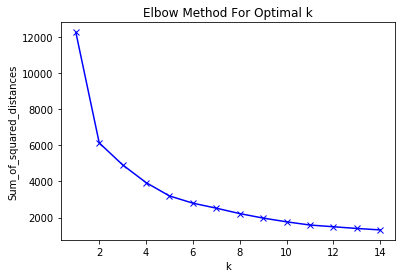

In [220]:
plt.plot(K1, Sum_of_squared_distances1, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [247]:
cluster1 = KMeans(n_clusters=4)
merge11_v2['cluster']=cluster1.fit_predict(merge11_v2)

In [232]:
merge11_v2.head()

hID  total_imp       cpm  total_views  total_imp_paid  \
0 -9175544061209790002   188755.0  3.315909        103.0             0.0   
1 -9156617651427282577     7364.0  3.359085        263.0             0.0   
2 -9145254332915205176    11180.0  3.341241        233.0             0.0   
3 -9124186022016029939    10045.0  3.302552         40.0             0.0   
4 -9060515269420703901  3120549.0  3.315909       2706.0       3167489.0   

   total_imp_organic  total_post  total_post_paid  total_post_organic  \
0           200528.0    249265.0              0.0            200421.0   
1             7703.0      7683.0              0.0              7600.0   
2            11963.0     15491.0              0.0             11353.0   
3             9389.0     16044.0              0.0              9351.0   
4           398818.0   3601177.0        3167489.0            395780.0   

   total_video_views  total_video_views_paid  total_video_views_organic  \
0            31096.0                     0.0                    31096.0   
1             1656.0                     0.0                     1656.0   
2              327.0                     0.0                      327.0   
3              602.0                     0.0                      602.0   
4           542816.0                475288.0                    67528.0   

   total_post_eng  total_cta  cluster  
0             0.0        2.0        0  
1             0.0        0.0        0  
2             0.0        1.0        0  
3             0.0        0.0        0  
4             0.0        0.0        0

In [248]:
merge11_v2_0 = merge11_v2[merge11_v2['cluster'] == 0]
merge11_v2_1 = merge11_v2[merge11_v2['cluster'] == 1]
merge11_v2_2 = merge11_v2[merge11_v2['cluster'] == 2]
merge11_v2_3 = merge11_v2[merge11_v2['cluster'] == 3]

In [249]:
df1_v2 = merge11_v2_0.mean(axis = 0)
df2_v2 = merge11_v2_1.mean(axis = 0)
df3_v2 = merge11_v2_2.mean(axis = 0)
df4_v3 = merge11_v2_3.mean(axis = 0)

df_table_v2 = pd.concat([df1_v2,df2_v2,df3_v2,df4_v3], axis =1)
df_table_v2.columns = ['cluster_1','cluster_2','cluster_3','cluster_4']
df_table_v2

cluster_1     cluster_2     cluster_3  \
hID                       -2.293838e+18  2.243030e+18 -7.087714e+18   
total_imp                  3.612611e+05  1.626782e+05  2.738531e+05   
cpm                        3.646752e+00  3.662326e+00  3.637835e+00   
total_views                1.371845e+03  7.697433e+02  1.352569e+03   
total_imp_paid             1.186257e+05  6.553312e+04  3.690610e+04   
total_imp_organic          5.871989e+05  1.582883e+05  4.319835e+05   
total_post                 7.178264e+05  2.338066e+05  5.086580e+05   
total_post_paid            1.184436e+05  6.522166e+04  3.688969e+04   
total_post_organic         5.661150e+05  1.552345e+05  4.287114e+05   
total_video_views          1.287781e+05  5.336308e+04  1.060884e+05   
total_video_views_paid     1.962352e+04  1.514183e+04  8.260892e+03   
total_video_views_organic  1.091546e+05  3.822125e+04  9.782750e+04   
total_post_eng             3.139521e+04  9.134524e+03  2.517462e+04   
total_cta                  7.146327e+00  5.408950e+00  1.266835e+01   
cluster                    0.000000e+00  1.000000e+00  2.000000e+00   

                              cluster_4  
hID                        6.931050e+18  
total_imp                  5.133826e+05  
cpm                        3.642497e+00  
total_views                2.193505e+03  
total_imp_paid             6.066648e+04  
total_imp_organic          1.093410e+06  
total_post                 1.186444e+06  
total_post_paid            6.066434e+04  
total_post_organic         1.086699e+06  
total_video_views          2.209507e+05  
total_video_views_paid     1.373273e+04  
total_video_views_organic  2.072179e+05  
total_post_eng             5.243802e+04  
total_cta                  7.903812e+00  
cluster                    3.000000e+00

In [379]:
merge11_v2_2.hID.nunique()

99

In [229]:
## Clustering 5 Clusters

In [244]:
cluster2 = KMeans(n_clusters=5)
merge11_v2['cluster']=cluster2.fit_predict(merge11_v2)

In [245]:
merge11_c2_0 = merge11_v2[merge11_v2['cluster'] == 0]
merge11_c2_1 = merge11_v2[merge11_v2['cluster'] == 1]
merge11_c2_2 = merge11_v2[merge11_v2['cluster'] == 2]
merge11_c2_3 = merge11_v2[merge11_v2['cluster'] == 3]
merge11_c2_4 = merge11_v2[merge11_v2['cluster'] == 4]

In [246]:
df1_c2 = merge11_c2_0.mean(axis = 0)
df2_c2 = merge11_c2_1.mean(axis = 0)
df3_c2 = merge11_c2_2.mean(axis = 0)
df4_c3 = merge11_c2_3.mean(axis = 0)
df5_c3 = merge11_c2_4.mean(axis = 0)

df_table_c2 = pd.concat([df1_c2,df2_c2,df3_c2,df4_c3,df5_c3], axis =1)
df_table_c2.columns = ['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5']
df_table_c2

cluster_1     cluster_2     cluster_3  \
hID                        7.504723e+18 -3.841362e+18 -4.767962e+16   
total_imp                  2.714998e+05  4.762048e+05  1.528197e+05   
cpm                        3.639552e+00  3.631682e+00  3.665424e+00   
total_views                1.765560e+03  1.392111e+03  1.158265e+03   
total_imp_paid             5.383384e+04  1.423949e+05  4.795923e+04   
total_imp_organic          4.745498e+05  7.354298e+05  2.259237e+05   
total_post                 5.535273e+05  9.046387e+05  2.843197e+05   
total_post_paid            5.383102e+04  1.421505e+05  4.788777e+04   
total_post_organic         4.701234e+05  7.106663e+05  2.207133e+05   
total_video_views          8.186359e+04  1.574576e+05  5.707207e+04   
total_video_views_paid     1.102589e+04  2.270171e+04  1.119714e+04   
total_video_views_organic  7.083770e+04  1.347559e+05  4.587494e+04   
total_post_eng             2.305566e+04  3.770336e+04  1.216987e+04   
total_cta                  6.112972e+00  1.101087e+01  6.405963e+00   
cluster                    0.000000e+00  1.000000e+00  2.000000e+00   

                              cluster_4     cluster_5  
hID                       -7.493191e+18  3.748757e+18  
total_imp                  2.571564e+05  5.235323e+05  
cpm                        3.639993e+00  3.657300e+00  
total_views                1.374133e+03  1.537862e+03  
total_imp_paid             3.357772e+04  7.972807e+04  
total_imp_organic          4.246303e+05  1.070600e+06  
total_post                 4.951408e+05  1.171159e+06  
total_post_paid            3.355831e+04  7.944366e+04  
total_post_organic         4.214480e+05  1.063925e+06  
total_video_views          1.084209e+05  2.480008e+05  
total_video_views_paid     8.372502e+03  1.826612e+04  
total_video_views_organic  1.000484e+05  2.297346e+05  
total_post_eng             2.647125e+04  5.246077e+04  
total_cta                  1.163616e+01  6.802271e+00  
cluster                    3.000000e+00  4.000000e+00

In [250]:
# As we can see the data is overlapping hence we will settle with only 4 Cluster

In [251]:
#funnel clusters
df_table_v2

cluster_1     cluster_2     cluster_3  \
hID                       -2.293838e+18  2.243030e+18 -7.087714e+18   
total_imp                  3.612611e+05  1.626782e+05  2.738531e+05   
cpm                        3.646752e+00  3.662326e+00  3.637835e+00   
total_views                1.371845e+03  7.697433e+02  1.352569e+03   
total_imp_paid             1.186257e+05  6.553312e+04  3.690610e+04   
total_imp_organic          5.871989e+05  1.582883e+05  4.319835e+05   
total_post                 7.178264e+05  2.338066e+05  5.086580e+05   
total_post_paid            1.184436e+05  6.522166e+04  3.688969e+04   
total_post_organic         5.661150e+05  1.552345e+05  4.287114e+05   
total_video_views          1.287781e+05  5.336308e+04  1.060884e+05   
total_video_views_paid     1.962352e+04  1.514183e+04  8.260892e+03   
total_video_views_organic  1.091546e+05  3.822125e+04  9.782750e+04   
total_post_eng             3.139521e+04  9.134524e+03  2.517462e+04   
total_cta                  7.146327e+00  5.408950e+00  1.266835e+01   
cluster                    0.000000e+00  1.000000e+00  2.000000e+00   

                              cluster_4  
hID                        6.931050e+18  
total_imp                  5.133826e+05  
cpm                        3.642497e+00  
total_views                2.193505e+03  
total_imp_paid             6.066648e+04  
total_imp_organic          1.093410e+06  
total_post                 1.186444e+06  
total_post_paid            6.066434e+04  
total_post_organic         1.086699e+06  
total_video_views          2.209507e+05  
total_video_views_paid     1.373273e+04  
total_video_views_organic  2.072179e+05  
total_post_eng             5.243802e+04  
total_cta                  7.903812e+00  
cluster                    3.000000e+00

In [286]:
#demographic clusters
df_table_v1

cluster_1     cluster_2     cluster_3      cluster_4
cpm           3.664512  3.591693e+00  3.512375e+00       3.640527
total_imp  5547.936620  2.756496e+06  1.086177e+06  336011.082048
01            0.082075  9.489576e-02  1.063153e-01       0.109700
02            0.080975  4.601006e-02  7.223989e-02       0.071288
03            0.084682  5.535586e-02  7.754051e-02       0.073665
04            0.082104  7.692308e-02  9.480539e-02       0.074416
05            0.083934  8.914450e-02  8.253824e-02       0.085489
06            0.081362  1.675054e-01  8.284113e-02       0.088367
07            0.086091  1.603163e-01  9.859155e-02       0.084770
08            0.084911  1.581596e-01  1.072240e-01       0.108480
09            0.083534  2.947520e-02  7.208844e-02       0.073446
10            0.086265  4.241553e-02  9.419961e-02       0.083112
11            0.080002  5.463695e-02  7.254278e-02       0.075104
12            0.084063  2.516175e-02  3.907315e-02       0.072164
1             0.247733  1.962617e-01  2.560957e-01       0.254653
2             0.247401  3.335730e-01  2.601848e-01       0.248272
3             0.254536  3.479511e-01  2.779040e-01       0.266696
4             0.250330  1.222142e-01  2.058155e-01       0.230379
Female        0.373914  5.176132e-01  5.131001e-01       0.549439
Male          0.372733  4.823868e-01  4.868999e-01       0.450561
Other         0.253353  0.000000e+00  0.000000e+00       0.000000
13-17         0.125272  0.000000e+00  3.028926e-03       0.033439
18-24         0.143026  5.506830e-01  3.822505e-01       0.328787
18-65+        0.141297  0.000000e+00  4.543389e-04       0.011949
25-34         0.148809  4.104960e-01  4.752385e-01       0.332103
35-44         0.151156  3.594536e-02  1.170680e-01       0.186743
45-54         0.148242  2.875629e-03  1.999091e-02       0.080860
55-64         0.142198  0.000000e+00  1.968802e-03       0.026119
cluster       0.000000  1.000000e+00  2.000000e+00       3.000000

In [288]:
funnelexp.head()

date                  hID  total_imp       cpm  total_views  \
0 2018-01-01 -9175544061209790002   188755.0  3.315909        103.0   
1 2018-01-01 -9156617651427282577     7364.0  3.359085        263.0   
2 2018-01-01 -9145254332915205176    11180.0  3.341241        233.0   
3 2018-01-01 -9124186022016029939    10045.0  3.302552         40.0   
4 2018-01-01 -9060515269420703901  3120549.0  3.315909       2706.0   

   total_imp_paid  total_imp_organic  total_post  total_post_paid  \
0             0.0           200528.0    249265.0              0.0   
1             0.0             7703.0      7683.0              0.0   
2             0.0            11963.0     15491.0              0.0   
3             0.0             9389.0     16044.0              0.0   
4       3167489.0           398818.0   3601177.0        3167489.0   

   total_post_organic  total_video_views  total_video_views_paid  \
0            200421.0            31096.0                     0.0   
1              7600.0             1656.0                     0.0   
2             11353.0              327.0                     0.0   
3              9351.0              602.0                     0.0   
4            395780.0           542816.0                475288.0   

   total_video_views_organic  total_post_eng  total_cta  year month day  \
0                    31096.0             0.0        2.0  2018    01  01   
1                     1656.0             0.0        0.0  2018    01  01   
2                      327.0             0.0        1.0  2018    01  01   
3                      602.0             0.0        0.0  2018    01  01   
4                    67528.0             0.0        0.0  2018    01  01   

   quarter  cluster  
0        1        2  
1        1        2  
2        1        2  
3        1        2  
4        1        2

In [298]:
#funnel 3 cluster with dates
funnelexp_c1 = funnelexp[funnelexp['cluster'] == 0]
funnelexp_c2 = funnelexp[funnelexp['cluster'] == 1]
funnelexp_c3 = funnelexp[funnelexp['cluster'] == 2]
funnelexp_c4 = funnelexp[funnelexp['cluster'] == 3]

In [299]:
funnelexp_c3.hID.nunique()

99

In [300]:
# demographic clusters with date

In [305]:
demoexp = pd.read_csv(r'C:\Users\Jigar\Desktop\Courses\Quater 3\Experiential\Viacom Dataset\Main file\Clusterd data\demographics.csv')

In [308]:
demoexp.head()

Unnamed: 0  year  month  quarter  gender age_range       cpm  total_imp  \
0           0  2018      1        1   Other    18-65+  3.002203        8.0   
1           1  2018      1        1  Female    18-65+  3.582871       84.0   
2           2  2018      1        1  Female     25-34  3.554804     4672.0   
3           3  2018      1        1    Male     35-44  3.437476      208.0   
4           4  2018      1        1   Other     45-54  3.883401        5.0   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

In [310]:
len(demoexp)

1655261

In [311]:
len(df_pg_imp)

2094349

In [312]:
demoexp_2018 = df_pg_imp[df_pg_imp['year'] == '2018']

In [313]:
len(demoexp_2018)

1655261

In [316]:
demoexp['date'] = demoexp_2018['date']

In [317]:
demoexp.head()

Unnamed: 0  year  month  quarter  gender age_range       cpm  total_imp  \
0           0  2018      1        1   Other    18-65+  3.002203        8.0   
1           1  2018      1        1  Female    18-65+  3.582871       84.0   
2           2  2018      1        1  Female     25-34  3.554804     4672.0   
3           3  2018      1        1    Male     35-44  3.437476      208.0   
4           4  2018      1        1   Other     45-54  3.883401        5.0   

   cluster       date  
0        0 2018-01-01  
1        0 2018-01-01  
2        0 2018-01-01  
3        0 2018-01-01  
4        0 2018-01-01

In [347]:
funnelexp.head()

Unnamed: 0        date                  hID  total_imp       cpm  \
0           0  2018-01-01 -9175544061209790002   188755.0  3.315909   
1           1  2018-01-01 -9156617651427282577     7364.0  3.359085   
2           2  2018-01-01 -9145254332915205176    11180.0  3.341241   
3           3  2018-01-01 -9124186022016029939    10045.0  3.302552   
4           4  2018-01-01 -9060515269420703901  3120549.0  3.315909   

   total_views  total_imp_paid  total_imp_organic  total_post  \
0        103.0             0.0           200528.0    249265.0   
1        263.0             0.0             7703.0      7683.0   
2        233.0             0.0            11963.0     15491.0   
3         40.0             0.0             9389.0     16044.0   
4       2706.0       3167489.0           398818.0   3601177.0   

   total_post_paid  total_post_organic  total_video_views  \
0              0.0            200421.0            31096.0   
1              0.0              7600.0             1656.0   
2              0.0             11353.0              327.0   
3              0.0              9351.0              602.0   
4        3167489.0            395780.0           542816.0   

   total_video_views_paid  total_video_views_organic  total_post_eng  \
0                     0.0                    31096.0             0.0   
1                     0.0                     1656.0             0.0   
2                     0.0                      327.0             0.0   
3                     0.0                      602.0             0.0   
4                475288.0                    67528.0             0.0   

   total_cta  year  month  day  quarter  cluster  
0        2.0  2018      1    1        1        2  
1        0.0  2018      1    1        1        2  
2        1.0  2018      1    1        1        2  
3        0.0  2018      1    1        1        2  
4        0.0  2018      1    1        1        2

In [349]:
funnelexp.sort_values(['total_cta'], ascending=[ False])

Unnamed: 0        date                  hID   total_imp       cpm  \
45046       85821  2018-06-25   561676128158873774    271523.0  5.370475   
14445       31302  2018-02-23   588064531587401799   1240486.0  2.118247   
61716      102491  2018-09-01 -4068021820648955467   4669134.0  3.893232   
21155       61434  2018-03-20 -3300241700544378190   3306596.0  2.057871   
6760        15447  2018-01-26  4453693992225383600   2387661.0  2.446500   
15408       34309  2018-02-26  5291306812915208260  13188403.0  2.211383   
15705       36651  2018-02-27  5291306812915208260  16469911.0  2.211383   
8637        19876  2018-02-02  4453693992225383600   1241496.0  2.624832   
16001       37969  2018-02-28  5291306812915208260  15995082.0  2.211383   
14816       32695  2018-02-24  5291306812915208260  11113532.0  2.211383   
16293       39283  2018-03-01  5291306812915208260  13206733.0  2.619446   
38732       79507  2018-05-30  5846808040579860367    837441.0  5.043122   
18022       47129  2018-03-07  5291306812915208260   6147999.0  2.356934   
14625       31993  2018-02-24 -6931466400814329169  13376915.0  2.211383   
14519       31887  2018-02-23  5291306812915208260   7102758.0  2.118247   
3159         8269  2018-01-13 -6931466400814329169   7565685.0  2.485750   
14329       31186  2018-02-23 -6931466400814329169  11378406.0  2.118247   
10497       23777  2018-02-09  4453693992225383600    140747.0  2.085338   
37011       77786  2018-05-23  5846808040579860367    764337.0  4.743480   
44065       84840  2018-06-21   717306677193711204    469300.0  5.483773   
39877       80652  2018-06-04  -818035086073208278   2062147.0  5.093657   
15112       33502  2018-02-25  5291306812915208260   9728990.0  2.211383   
2896         7495  2018-01-12 -6931466400814329169   7822936.0  2.500807   
6710        15397  2018-01-26   588064531587401799   1498314.0  2.446500   
16877       41908  2018-03-03  5291306812915208260   8552804.0  2.657740   
12431       26222  2018-02-16  4453693992225383600    142401.0  2.324924   
4726        11880  2018-01-19 -6931466400814329169   7593393.0  2.922284   
2630         7229  2018-01-11 -6931466400814329169   8268100.0  2.526360   
8214        18945  2018-02-01 -6931466400814329169   5001366.0  2.619446   
15809       36755  2018-02-28 -6931466400814329169   8789703.0  2.211383   
...           ...         ...                  ...         ...       ...   
36661       77436  2018-05-22 -2997669780920391933   2788390.0  4.944082   
36660       77435  2018-05-22 -3234835210919527967   1065478.0  4.944082   
36657       77432  2018-05-22 -3308772218245737937     15305.0  5.224437   
36656       77431  2018-05-22 -3345131084630546773    124767.0  4.944082   
36654       77429  2018-05-22 -3437962653131081830    119434.0  4.944082   
36692       77467  2018-05-22  -254727734778809055      8665.0  4.999357   
36652       77427  2018-05-22 -3701709818253641188    887189.0  4.944082   
36651       77426  2018-05-22 -3706787235844013678     22920.0  4.999357   
36650       77425  2018-05-22 -3789614879902018912       150.0  5.200342   
36649       77424  2018-05-22 -3854007563327648048       304.0  5.317096   
36648       77423  2018-05-22 -3897101595688741637     44282.0  4.944082   
36647       77422  2018-05-22 -3915348393366021361      1357.0  5.299989   
36665       77440  2018-05-22 -2346053214806339263    175233.0  4.944082   
36666       77441  2018-05-22 -2293191460982154968    609831.0  4.944082   
36667       77442  2018-05-22 -2169486952749159347      1680.0  5.142916   
36668       77443  2018-05-22 -2122820348657791787     39330.0  4.944082   
36669       77444  2018-05-22 -2002388511327242529       990.0  5.209629   
36671       77446  2018-05-22 -1902537841256727335      8163.0  5.065308   
36672       77447  2018-05-22 -1790369226143859744      2326.0  5.142916   
36673       77448  2018-05-22 -1393820648013259287      2091.0  4.999357   
36674       77449  2018-05-22 -1326060263180539922     

In [351]:
funnelexp_c3.sort_values(['total_cta','cpm','total_imp_paid'], ascending=[False,True,True])

date                  hID   total_imp       cpm  total_views  \
31993 2018-02-24 -6931466400814329169  13376915.0  2.211383     102173.0   
8269  2018-01-13 -6931466400814329169   7565685.0  2.485750      80209.0   
31186 2018-02-23 -6931466400814329169  11378406.0  2.118247      90459.0   
7495  2018-01-12 -6931466400814329169   7822936.0  2.500807      63418.0   
11880 2018-01-19 -6931466400814329169   7593393.0  2.922284      58073.0   
7229  2018-01-11 -6931466400814329169   8268100.0  2.526360      54614.0   
18945 2018-02-01 -6931466400814329169   5001366.0  2.619446      64325.0   
36755 2018-02-28 -6931466400814329169   8789703.0  2.211383      60461.0   
11112 2018-01-18 -6931466400814329169   6613052.0  2.983178      51602.0   
6965  2018-01-10 -6931466400814329169   7485962.0  2.566495      53779.0   
69279 2018-04-19 -6931466400814329169   7670665.0  2.776306      37210.0   
72740 2018-05-03 -6931466400814329169   6250532.0  4.639995      48979.0   
56868 2018-03-14 -6931466400814329169   5642723.0  1.452053      62820.0   
71514 2018-04-28 -6931466400814329169   9326892.0  3.974690      58044.0   
38072 2018-03-01 -6931466400814329169   4351734.0  2.619446      51763.0   
14759 2018-01-24 -6931466400814329169   4820030.0  2.393217      43850.0   
71263 2018-04-27 -6931466400814329169   6194816.0  3.974678      60301.0   
69031 2018-04-18 -6931466400814329169   3857667.0  2.799878      38962.0   
39387 2018-03-02 -6931466400814329169   3728003.0  2.624832      54854.0   
71016 2018-04-26 -6931466400814329169   8663620.0  3.974679      52173.0   
80088 2018-06-02 -6931466400814329169   5805695.0  4.951782      55393.0   
10850 2018-01-17 -6931466400814329169   6110838.0  2.340163      48359.0   
63812 2018-03-28 -6931466400814329169   6031488.0  2.211383      44506.0   
72494 2018-05-02 -6931466400814329169   6147157.0  4.635094      54190.0   
30375 2018-02-22 -6931466400814329169   8021688.0  2.114097      57585.0   
47224 2018-03-08 -6931466400814329169   3275339.0  2.339153      49827.0   
4120  2018-01-05 -6931466400814329169   6086613.0  3.116283      47718.0   
79588 2018-05-31 -6931466400814329169   4431597.0  5.072171      52170.0   
58132 2018-03-15 -6931466400814329169   3770827.0  2.148334      44112.0   
18172 2018-01-31 -6931466400814329169   9321748.0  2.519613      47735.0   
...          ...                  ...         ...       ...          ...   
85259 2018-06-23 -5386144112445340314       134.0  5.708610          0.0   
83496 2018-06-16 -7575327633620706456       134.0  5.714788         21.0   
84763 2018-06-21 -5461526353880549005       486.0  5.718666        180.0   
85736 2018-06-25 -6396612749533183814       220.0  5.718825         44.0   
85491 2018-06-24 -6396612749533183814       256.0  5.720159         69.0   
84491 2018-06-20 -7575327633620706456       289.0  5.723308        121.0   
84258 2018-06-19 -5818747722091201231       200.0  5.723417         23.0   
82537 2018-06-12 -5461526353880549005       112.0  5.723788         39.0   
85990 2018-06-26 -5461526353880549005       112.0  5.724950         68.0   
81072 2018-06-06 -6854125332400432248       120.0  5.726580          1.0   
83006 2018-06-14 -7575327633620706456       268.0  5.727685          7.0   
86216 2018-06-27 -6408434427167214497       258.0  5.735065        164.0   
85011 2018-06-22 -5510101548529760515      1036.0  5.744767        237.0   
82788 2018-06-13 -4883083235163949573       101.0  5.747205         76.0   
82293 2018-06-11 -5386144112445340314       102.0  5.755195          1.0   
84502 2018-06-20 -6396612749533183814       231.0  5.762839         21.0   
85472 2018-06-24 -7951907976646523184       693.0  5.767977        312.0   
83762 2018-06-17 -5818747722091201231       294.0  5.783700         36.0   
84016 2018-06-18 -5461526353880549005       100.0  5.790925         47.0   
85507 2018-06-24 -5461526353880549005       288.0  5.793367         72.0   
84754 2018-06-21 -6068946375942888171       178.0  5.796916 

In [358]:
sortedfunnel_c3 =funnelexp_c3.sort_values(['total_cta','cpm','total_imp_paid'], ascending=[False,True,True])

In [362]:
sortedfunnel_c3.quarter.nunique()

4

In [364]:
sortedfunnel_c3(['quarter']=='2')

TypeError: 'DataFrame' object is not callable

In [367]:
sortedfunnel_c3_q1= sortedfunnel_c3[sortedfunnel_c3['quarter']==1]
sortedfunnel_c3_q2=sortedfunnel_c3[sortedfunnel_c3['quarter']==2]
sortedfunnel_c3_q3= sortedfunnel_c3[sortedfunnel_c3['quarter']==3]
sortedfunnel_c3_q4= sortedfunnel_c3[sortedfunnel_c3['quarter']==4]

In [368]:
sortedfunnel_c3_q4.head()

date                  hID  total_imp       cpm  total_views  \
119298 2018-11-07 -6931466400814329169  9648123.0  3.710977      69747.0   
119782 2018-11-09 -6931466400814329169  8405686.0  3.642627      87114.0   
119540 2018-11-08 -6931466400814329169  8087568.0  3.647067      93969.0   
120026 2018-11-10 -6931466400814329169  7515984.0  3.663483      57489.0   
124765 2018-11-30 -6931466400814329169  5161820.0  3.433598      49110.0   

        total_imp_paid  total_imp_organic  total_post  total_post_paid  \
119298       6652451.0         11903311.0  18431863.0        6652451.0   
119782       2806563.0         19040022.0  21804415.0        2806563.0   
119540       3025354.0         17098145.0  20069432.0        3025354.0   
120026       1797754.0         16954210.0  18684697.0        1797754.0   
124765        344044.0         12936441.0  13261551.0         344044.0   

        total_post_organic  total_video_views  total_video_views_paid  \
119298          11779412.0          4233301.0               1544914.0   
119782          18997852.0          6742769.0               1053593.0   
119540          17044078.0          4831079.0               1104193.0   
120026          16886943.0          4608505.0                703605.0   
124765          12917507.0          4178021.0                 99819.0   

        total_video_views_organic  total_post_eng  total_cta  year month day  \
119298                  2688387.0       1324796.0      771.0  2018    11  07   
119782                  5689176.0       2813511.0      738.0  2018    11  09   
119540                  3726886.0       2142987.0      640.0  2018    11  08   
120026                  3904900.0       2053050.0      597.0  2018    11  10   
124765                  4078202.0       1792120.0      532.0  2018    11  30   

        quarter  cluster  
119298        4        2  
119782        4        2  
119540        4        2  
120026        4        2  
124765        4        2

In [370]:
### checking High CTA, low CPM, low Paid impressions in Each quarter 
#Quater 1
sortedfunnel_c3_q1.sort_values(['total_cta','cpm','total_imp_paid'], ascending=[False,True,True])

date                  hID   total_imp       cpm  total_views  \
31993 2018-02-24 -6931466400814329169  13376915.0  2.211383     102173.0   
8269  2018-01-13 -6931466400814329169   7565685.0  2.485750      80209.0   
31186 2018-02-23 -6931466400814329169  11378406.0  2.118247      90459.0   
7495  2018-01-12 -6931466400814329169   7822936.0  2.500807      63418.0   
11880 2018-01-19 -6931466400814329169   7593393.0  2.922284      58073.0   
7229  2018-01-11 -6931466400814329169   8268100.0  2.526360      54614.0   
18945 2018-02-01 -6931466400814329169   5001366.0  2.619446      64325.0   
36755 2018-02-28 -6931466400814329169   8789703.0  2.211383      60461.0   
11112 2018-01-18 -6931466400814329169   6613052.0  2.983178      51602.0   
6965  2018-01-10 -6931466400814329169   7485962.0  2.566495      53779.0   
56868 2018-03-14 -6931466400814329169   5642723.0  1.452053      62820.0   
38072 2018-03-01 -6931466400814329169   4351734.0  2.619446      51763.0   
14759 2018-01-24 -6931466400814329169   4820030.0  2.393217      43850.0   
39387 2018-03-02 -6931466400814329169   3728003.0  2.624832      54854.0   
10850 2018-01-17 -6931466400814329169   6110838.0  2.340163      48359.0   
63812 2018-03-28 -6931466400814329169   6031488.0  2.211383      44506.0   
30375 2018-02-22 -6931466400814329169   8021688.0  2.114097      57585.0   
47224 2018-03-08 -6931466400814329169   3275339.0  2.339153      49827.0   
4120  2018-01-05 -6931466400814329169   6086613.0  3.116283      47718.0   
58132 2018-03-15 -6931466400814329169   3770827.0  2.148334      44112.0   
18172 2018-01-31 -6931466400814329169   9321748.0  2.519613      47735.0   
23351 2018-02-08 -6931466400814329169   3956542.0  2.339153      35888.0   
23093 2018-02-07 -6931466400814329169   3599327.0  2.356934      38524.0   
45937 2018-03-07 -6931466400814329169   3207512.0  2.356934      46469.0   
59394 2018-03-16 -6931466400814329169   5003758.0  2.324924      45288.0   
12654 2018-01-20 -6931466400814329169   5228278.0  2.255486      46598.0   
64058 2018-03-29 -6931466400814329169   5007154.0  2.211383      35492.0   
15026 2018-01-25 -6931466400814329169   3789446.0  2.409797      34320.0   
48480 2018-03-09 -6931466400814329169   3905333.0  2.085338      39806.0   
62375 2018-03-22 -6931466400814329169   3338077.0  2.114097      40616.0   
...          ...                  ...         ...       ...          ...   
48    2018-01-01 -5910359500759990458   2815573.0  3.315909        714.0   
4     2018-01-01 -9060515269420703901   3120549.0  3.315909       2706.0   
55    2018-01-01 -5410682077499677357      5642.0  3.315909         66.0   
13    2018-01-01 -8334512205093436265     59527.0  3.315909        562.0   
773   2018-01-02 -8061563113554243534      2140.0  3.321630       1814.0   
38    2018-01-01 -6408434427167214497       212.0  3.322998        127.0   
50    2018-01-01 -5786498867749340105       114.0  3.328429        106.0   
5     2018-01-01 -9053951776935744471       218.0  3.328429        163.0   
14    2018-01-01 -8226406304255505398        62.0  3.330216         80.0   
45    2018-01-01 -6068946375942888171        80.0  3.339407         37.0   
9     2018-01-01 -8772732350363055626      3316.0  3.341241        180.0   
18    2018-01-01 -7973638883996981484     49509.0  3.341241        286.0   
44    2018-01-01 -6073699359554574904        85.0  3.348836         48.0   
794   2018-01-02 -6396612749533183814       160.0  3.352060         32.0   
813   2018-01-02 -5386144112445340314        40.0  3.354411          1.0   
25    2018-01-01 -7690511537241942597        42.0  3.356775         50.0   
51    2018-01-01 -5768875520275520636       347.0  3.358991        180.0   
1     2018-01-01 -9156617651427282577      7364.0  3.359085        263.0   
28    2018-01-01 -7575327633620706456       648.0  3.360585         13.0   
57    2018-01-01 -5386144112445340314        68.0  3.364120          2.0   
17    2018-01-01 -8061563113554243534      1845.0  3.369814 

In [371]:
#Quater
sortedfunnel_c3_q2.sort_values(['total_cta','cpm','total_imp_paid'], ascending=[False,True,True])

date                  hID  total_imp       cpm  total_views  \
69279 2018-04-19 -6931466400814329169  7670665.0  2.776306      37210.0   
72740 2018-05-03 -6931466400814329169  6250532.0  4.639995      48979.0   
71514 2018-04-28 -6931466400814329169  9326892.0  3.974690      58044.0   
71263 2018-04-27 -6931466400814329169  6194816.0  3.974678      60301.0   
69031 2018-04-18 -6931466400814329169  3857667.0  2.799878      38962.0   
71016 2018-04-26 -6931466400814329169  8663620.0  3.974679      52173.0   
80088 2018-06-02 -6931466400814329169  5805695.0  4.951782      55393.0   
72494 2018-05-02 -6931466400814329169  6147157.0  4.635094      54190.0   
79588 2018-05-31 -6931466400814329169  4431597.0  5.072171      52170.0   
70766 2018-04-25 -6931466400814329169  6528354.0  3.974697      53606.0   
79839 2018-06-01 -6931466400814329169  4748334.0  5.118830      47721.0   
69524 2018-04-20 -6931466400814329169  4933375.0  3.660762      32373.0   
72987 2018-05-04 -6931466400814329169  4258778.0  4.631403      48573.0   
67519 2018-04-12 -6931466400814329169  4894082.0  4.515046      34466.0   
75926 2018-05-16 -6931466400814329169  3293251.0  4.795211      36898.0   
77628 2018-05-23 -6931466400814329169  4634748.0  4.743480      33759.0   
73229 2018-05-05 -6931466400814329169  4601284.0  4.631402      40901.0   
74453 2018-05-10 -6931466400814329169  5155450.0  4.785885      34788.0   
65765 2018-04-05 -6931466400814329169  3545499.0  4.514522      21277.0   
82766 2018-06-13 -6931466400814329169  4144349.0  5.276237      40286.0   
67773 2018-04-13 -6931466400814329169  2865877.0  4.515047      27202.0   
76174 2018-05-17 -6931466400814329169  5444423.0  4.668684      35358.0   
74700 2018-05-11 -6931466400814329169  2817938.0  4.725753      35658.0   
81315 2018-06-07 -6931466400814329169  4355187.0  5.134336      33244.0   
74206 2018-05-09 -6931466400814329169  2902146.0  4.539035      29513.0   
83011 2018-06-14 -6931466400814329169  6706935.0  5.270502      44458.0   
76420 2018-05-18 -6931466400814329169  2883320.0  4.789194      29315.0   
81071 2018-06-06 -6931466400814329169  4522291.0  5.130001      36965.0   
67267 2018-04-11 -6931466400814329169  2572445.0  4.514915      29704.0   
81557 2018-06-08 -6931466400814329169  4175882.0  5.140400      30055.0   
...          ...                  ...        ...       ...          ...   
85259 2018-06-23 -5386144112445340314      134.0  5.708610          0.0   
83496 2018-06-16 -7575327633620706456      134.0  5.714788         21.0   
84763 2018-06-21 -5461526353880549005      486.0  5.718666        180.0   
85736 2018-06-25 -6396612749533183814      220.0  5.718825         44.0   
85491 2018-06-24 -6396612749533183814      256.0  5.720159         69.0   
84491 2018-06-20 -7575327633620706456      289.0  5.723308        121.0   
84258 2018-06-19 -5818747722091201231      200.0  5.723417         23.0   
82537 2018-06-12 -5461526353880549005      112.0  5.723788         39.0   
85990 2018-06-26 -5461526353880549005      112.0  5.724950         68.0   
81072 2018-06-06 -6854125332400432248      120.0  5.726580          1.0   
83006 2018-06-14 -7575327633620706456      268.0  5.727685          7.0   
86216 2018-06-27 -6408434427167214497      258.0  5.735065        164.0   
85011 2018-06-22 -5510101548529760515     1036.0  5.744767        237.0   
82788 2018-06-13 -4883083235163949573      101.0  5.747205         76.0   
82293 2018-06-11 -5386144112445340314      102.0  5.755195          1.0   
84502 2018-06-20 -6396612749533183814      231.0  5.762839         21.0   
85472 2018-06-24 -7951907976646523184      693.0  5.767977        312.0   
83762 2018-06-17 -5818747722091201231      294.0  5.783700         36.0   
84016 2018-06-18 -5461526353880549005      100.0  5.790925         47.0   
85507 2018-06-24 -5461526353880549005      288.0  5.793367         72.0   
84754 2018-06-21 -6068946375942888171      178.0  5.796916         48.0   
85480 2018-06-24 -7575327633620706456

In [372]:
sortedfunnel_c3_q3.sort_values(['total_cta','cpm','total_imp_paid'], ascending=[False,True,True])

date                  hID  total_imp       cpm  total_views  \
91884  2018-07-20 -6931466400814329169  4807096.0  4.576259      64401.0   
91645  2018-07-19 -6931466400814329169  4856228.0  4.693342      59291.0   
91405  2018-07-18 -6931466400814329169  5032799.0  4.632209      49323.0   
103965 2018-09-07 -6931466400814329169  5158793.0  3.863167      36177.0   
98535  2018-08-16 -6931466400814329169  6275536.0  3.840728      50358.0   
92126  2018-07-21 -6931466400814329169  4047129.0  4.560074      50837.0   
109245 2018-09-28 -6931466400814329169  5520222.0  3.723824      56817.0   
108994 2018-09-27 -6931466400814329169  6744813.0  3.769384      61390.0   
98289  2018-08-15 -6931466400814329169  6245806.0  3.859247      41221.0   
98776  2018-08-17 -6931466400814329169  5970183.0  3.846126      33885.0   
109497 2018-09-29 -6931466400814329169  4759916.0  3.660539      48132.0   
104213 2018-09-08 -6931466400814329169  5308267.0  3.854796      30920.0   
96586  2018-08-08 -6931466400814329169  4205290.0  3.880803      31025.0   
105215 2018-09-12 -6931466400814329169  4945024.0  3.769803      41357.0   
103719 2018-09-06 -6931466400814329169  4635970.0  3.983225      39043.0   
97071  2018-08-10 -6931466400814329169  4899912.0  3.827143      32276.0   
108741 2018-09-26 -6931466400814329169  5248608.0  3.816522      48472.0   
95364  2018-08-03 -6931466400814329169  3182041.0  3.625676      30376.0   
105717 2018-09-14 -6931466400814329169  4947168.0  3.699578      38163.0   
93605  2018-07-27 -6931466400814329169  2831335.0  3.558493      28817.0   
93107  2018-07-25 -6931466400814329169  2869823.0  4.410195      26708.0   
95117  2018-08-02 -6931466400814329169  3478863.0  3.623720      31084.0   
96827  2018-08-09 -6931466400814329169  3953773.0  3.855554      29439.0   
105464 2018-09-13 -6931466400814329169  4803170.0  3.703490      34833.0   
97318  2018-08-11 -6931466400814329169  7551401.0  3.869763      29019.0   
94867  2018-08-01 -6931466400814329169  3290470.0  3.584745      27552.0   
99019  2018-08-18 -6931466400814329169  5404446.0  3.829782      25848.0   
93851  2018-07-28 -6931466400814329169  3101382.0  3.547198      25980.0   
91162  2018-07-17 -6931466400814329169  3217454.0  4.775832      22005.0   
93358  2018-07-26 -6931466400814329169  3112123.0  4.204077      29615.0   
...           ...                  ...        ...       ...          ...   
87160  2018-07-01 -8801584497543469326     1525.0  5.236976         34.0   
87675  2018-07-03 -7790577727904649082      165.0  5.239534         52.0   
87687  2018-07-03 -6746470096460591756      213.0  5.241645         66.0   
87202  2018-07-01 -5533355377136130755     1029.0  5.243834         62.0   
87180  2018-07-01 -7198217930959990543      483.0  5.262224         47.0   
87190  2018-07-01 -6396612749533183814     1591.0  5.276593         24.0   
87204  2018-07-01 -5379446874000017649     1759.0  5.276593         62.0   
87186  2018-07-01 -6746470096460591756      195.0  5.277219         54.0   
87207  2018-07-01 -5023026048409595840      474.0  5.277219        127.0   
90669  2018-07-15 -6396612749533183814      210.0  5.283790         26.0   
90684  2018-07-15 -5461526353880549005      298.0  5.284806         40.0   
87167  2018-07-01 -8069837581277643352      132.0  5.290813         32.0   
87182  2018-07-01 -7019117929478186671      205.0  5.290813         18.0   
87422  2018-07-02 -7790577727904649082      223.0  5.299229          9.0   
87427  2018-07-02 -7575327633620706456      326.0  5.299229          7.0   
87415  2018-07-02 -8069837581277643352      137.0  5.304205         40.0   
87659  2018-07-03 -8980675186003719279      146.0  5.311134         26.0   
87451  2018-07-02 -5461526353880549005      289.0  5.316310         23.0   
87708  2018-07-03 -5023026048409595840      969.0  5.318526        161.0   
87686  2018-07-03 -6854125332400432248      330.0  5.318526          5.0   
88928  2018-07-08 -6396612749533183814      424.0  5.320495  

In [373]:
sortedfunnel_c3_q4.sort_values(['total_cta','cpm','total_imp_paid'], ascending=[False,True,True])

date                  hID  total_imp       cpm  total_views  \
119298 2018-11-07 -6931466400814329169  9648123.0  3.710977      69747.0   
119782 2018-11-09 -6931466400814329169  8405686.0  3.642627      87114.0   
119540 2018-11-08 -6931466400814329169  8087568.0  3.647067      93969.0   
120026 2018-11-10 -6931466400814329169  7515984.0  3.663483      57489.0   
124765 2018-11-30 -6931466400814329169  5161820.0  3.433598      49110.0   
127912 2018-12-13 -6931466400814329169  3903778.0  3.449224      48907.0   
125971 2018-12-05 -6931466400814329169  5778062.0  3.598958      65252.0   
128150 2018-12-14 -6931466400814329169  3803934.0  3.438766      50504.0   
126445 2018-12-07 -6931466400814329169  4571898.0  3.505430      54205.0   
127663 2018-12-12 -6931466400814329169  3909763.0  3.496722      43901.0   
121235 2018-11-15 -6931466400814329169  3217214.0  3.918282      38885.0   
120997 2018-11-14 -6931466400814329169  3738274.0  3.908355      38533.0   
121473 2018-11-16 -6931466400814329169  3134361.0  3.891628      42298.0   
124540 2018-11-29 -6931466400814329169  6361714.0  3.454845      49470.0   
126211 2018-12-06 -6931466400814329169  4743612.0  3.536445      57886.0   
124309 2018-11-28 -6931466400814329169  3750716.0  3.446738      40391.0   
114551 2018-10-19 -6931466400814329169  4528025.0  2.875722      35386.0   
128399 2018-12-15 -6931466400814329169  3513897.0  3.412095      36200.0   
110749 2018-10-04 -6931466400814329169  6828263.0  3.551384      43222.0   
129861 2018-12-21 -6931466400814329169  5211600.0  3.261545      50003.0   
110501 2018-10-03 -6931466400814329169  5616319.0  3.567367      40465.0   
112778 2018-10-12 -6931466400814329169  3782873.0  3.132272      43243.0   
111005 2018-10-05 -6931466400814329169  4965895.0  3.382509      35586.0   
120267 2018-11-11 -6931466400814329169  4818351.0  3.741566      30950.0   
121715 2018-11-17 -6931466400814329169  3100292.0  3.778883      32938.0   
125005 2018-12-01 -6931466400814329169  5074586.0  3.568442      42697.0   
114297 2018-10-18 -6931466400814329169  4059652.0  2.890952      33666.0   
117559 2018-10-31 -6931466400814329169  5807810.0  3.403660      34052.0   
129620 2018-12-20 -6931466400814329169  4211480.0  3.266644      40062.0   
114040 2018-10-17 -6931466400814329169  4399255.0  2.904532      36798.0   
...           ...                  ...        ...       ...          ...   
121483 2018-11-16 -6068946375942888171      554.0  3.953249         67.0   
120996 2018-11-14 -6955945058125691884      504.0  3.953556        259.0   
121237 2018-11-15 -6459551797493886410      191.0  3.961191         20.0   
121238 2018-11-15 -6408434427167214497      604.0  3.962593        203.0   
121230 2018-11-15 -7575327633620706456      312.0  3.963277         17.0   
121253 2018-11-15 -5574759224542349209      839.0  3.963753          6.0   
121454 2018-11-16 -8604422723199351182      784.0  3.965795        172.0   
120530 2018-11-12 -5751819148993582614      161.0  3.968791         46.0   
120975 2018-11-14 -8642314511715452180     3080.0  3.969876        265.0   
120754 2018-11-13 -7019117929478186671      121.0  3.969885         23.0   
121251 2018-11-15 -5768875520275520636      487.0  3.974060        239.0   
120980 2018-11-14 -8069837581277643352      109.0  3.975900         42.0   
120971 2018-11-14 -9025522220386825589      291.0  3.975928         51.0   
121453 2018-11-16 -8642314511715452180    13233.0  3.980329        227.0   
121017 2018-11-14 -5533355377136130755      350.0  3.980800         97.0   
121220 2018-11-15 -7973638883996981484     5201.0  3.981600        127.0   
121257 2018-11-15 -5379446874000017649     6973.0  3.981600         40.0   
121234 2018-11-15 -6955945058125691884      502.0  3.987927        298.0   
121449 2018-11-16 -9025522220386825589      517.0  3.992362         62.0   
121254 2018-11-15 -5533355377136130755      294.0  3.993459         81.0   
121016 2018-11-14 -5574759224542349209      942.0  4.005742  

In [374]:
df_pg_imp_paid.hID.nunique()

597

In [375]:
asda = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//page_impressions_paid.csv")

In [376]:
asda.hID.nunique()

597

In [380]:
funnelexp.to_csv(r'C:\Users\Jigar\Desktop\funnelexp12.csv')

In [2]:
os.getwd()

AttributeError: module 'os' has no attribute 'getwd'

In [5]:
combi = pd.read_csv("C://Users//Jigar//Desktop//Courses//Quater 3//Experiential//Viacom Dataset//Main file//combined_csv.csv")

In [6]:
combi.shape

(25682421, 5)